## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

In [9]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [3]:

fashion_mnist = fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [13]:
test_images[0].shape

(28, 28)

In [16]:
test_labels[0]

9

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

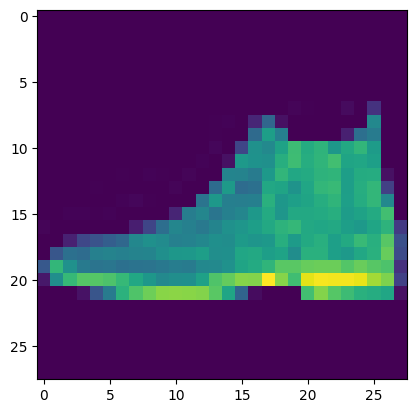

In [22]:
plt.imshow(test_images[0])

0 T-shirt/top
19


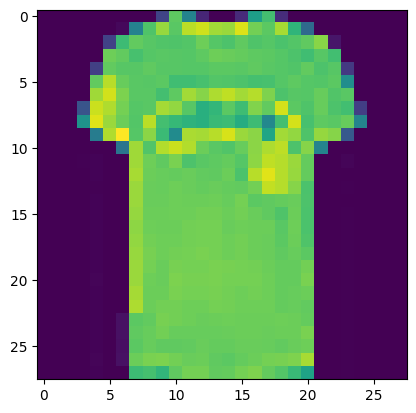

1 Trouser
2


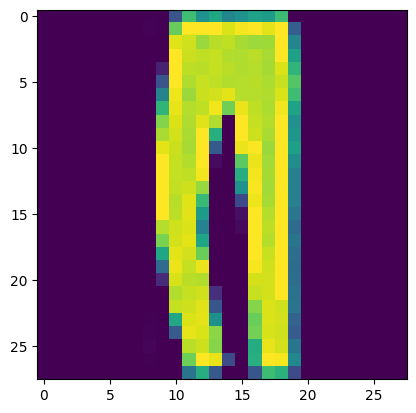

2 Pullover
1


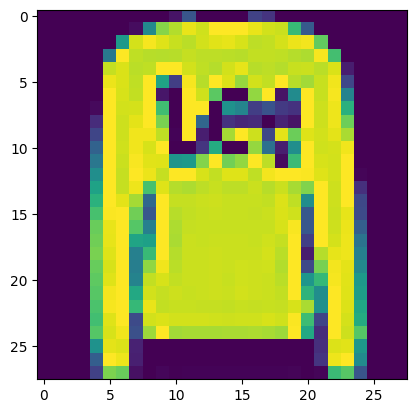

3 Dress
13


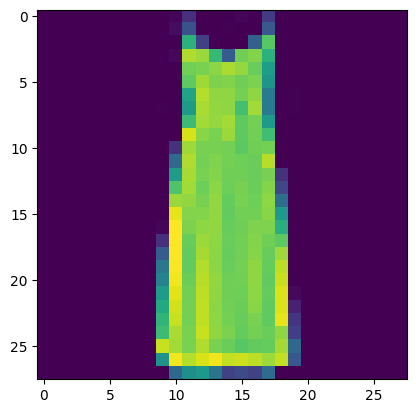

4 Coat
6


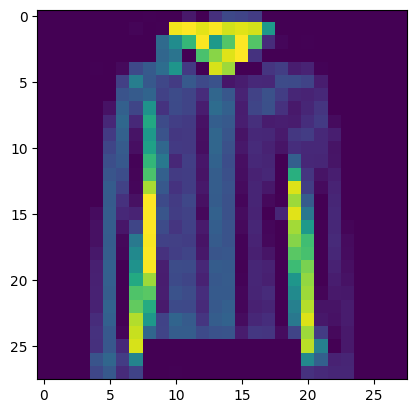

5 Sandal
8


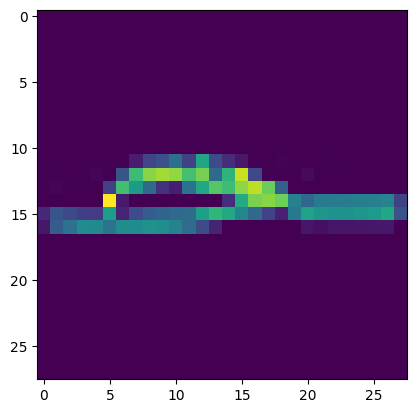

6 Shirt
4


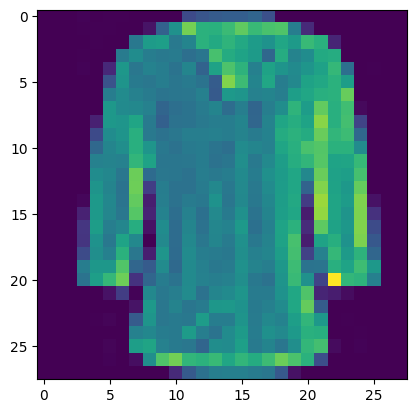

7 Sneaker
9


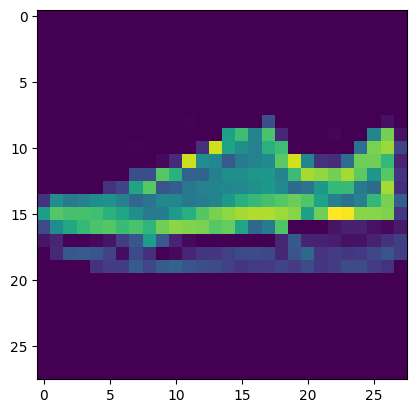

8 Bag
18


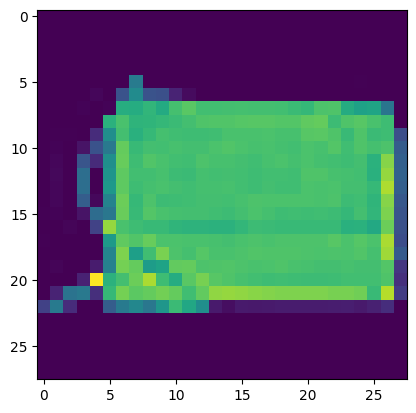

9 Ankle boot
0


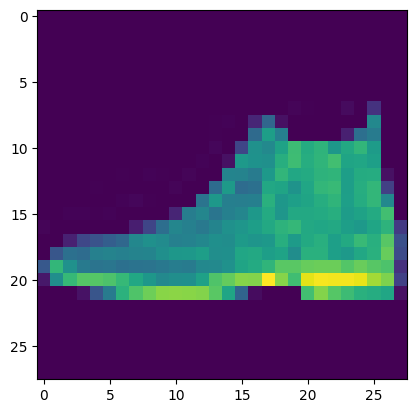

In [25]:
for class_name in class_names:
    class_index = class_names.index(class_name)

    # Get the index of the first occurrence of the test label matching the class name
    index_in_images = np.where(test_labels == class_index)[0][0] #[0][0] will find the first index position 
    print(class_index, class_name)
    print(index_in_images)
    plt.imshow(test_images[index_in_images])
    plt.show()

In [29]:
# normalize the data
def normalize(data):
    """
    Normalize the data so all values are between 0 and 1
    """
    return (data-np.min(data))/(np.max(data)-np.min(data))

scaled_train = normalize(train_images)
scaled_test = normalize(test_images)
print(np.min(scaled_train))
np.max(scaled_train)

0.0


1.0

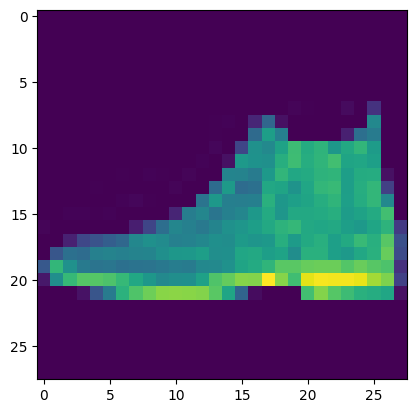

In [30]:
# Make sure scaled data still works
plt.imshow(scaled_test[0])

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [31]:
from tensorflow.keras.models import Sequential        # Helper to build a network from a sequence of layers
from tensorflow.keras.layers import Dense             # Fully-connected layer
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if val loss stops decreasing
from tensorflow.keras.utils import to_categorical

In [33]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(28*28,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
# reshape our input into a format that the model can read: all pixels for each image in one row of a 2D array. 
train_images = train_images.reshape((-1, 28 * 28))
train_images = train_images.astype('float32') 
test_images = test_images.reshape((-1, 28 * 28))
test_images = test_images.astype('float32') 

In [48]:
train_images.shape

(60000, 784)

In [35]:
# encode our target as categories:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
bs = 128
model.fit(train_images, train_labels, epochs=5, batch_size=bs)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 3.6620 - accuracy: 0.6168
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8417 - accuracy: 0.7273
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.7649
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6182 - accuracy: 0.7868
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.6282 - accuracy: 0.7893
test_acc: 0.7893000245094299 test_loss 0.6281772255897522


In [37]:
# Repeat the fit to improve the model
bs = 128
model.fit(train_images, train_labels, epochs=5, batch_size=bs)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5439 - accuracy: 0.8104
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.8155
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.8246
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4997 - accuracy: 0.8260
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.8104
test_acc: 0.8104000091552734 test_loss 0.5644738078117371


In [38]:
bs = 128
model.fit(train_images, train_labels, epochs=10, batch_size=bs)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.8314
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.8339
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.8385
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.8407
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4481 - accuracy: 0.8413
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8436
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.8422
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4348 - accuracy: 0.8472
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4301 - accuracy: 0.8471
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.8276

In [39]:
bs = 128
model.fit(train_images, train_labels, epochs=5, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8508 - val_loss: 0.5182 - val_accuracy: 0.8327
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8531 - val_loss: 0.4621 - val_accuracy: 0.8388
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8509 - val_loss: 0.5000 - val_accuracy: 0.8289
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8542 - val_loss: 0.4724 - val_accuracy: 0.8415
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.8252
test_acc: 0.8252000212669373 test_loss 0.5114590525627136


In [40]:
bs = 200
model.fit(train_images, train_labels, epochs=10, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3871 - accuracy: 0.8602 - val_loss: 0.4769 - val_accuracy: 0.8406
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3812 - accuracy: 0.8640 - val_loss: 0.4875 - val_accuracy: 0.8439
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8644 - val_loss: 0.4504 - val_accuracy: 0.8472
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3788 - accuracy: 0.8646 - val_loss: 0.4716 - val_accuracy: 0.8387
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3802 - accuracy: 0.8634 - val_loss: 0.4823 - val_accuracy: 0.8400
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.8441
test_acc: 0.8440999984741211 test_loss 0.47346875071525574


In [41]:
y_pred = model.predict(test_images)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[7.6911441e-20, 2.6188710e-17, 1.4031916e-19, ..., 9.1668125e-03,
        2.7545715e-16, 9.6066636e-01],
       [5.0560760e-05, 1.5037389e-09, 9.9016309e-01, ..., 0.0000000e+00,
        5.6687015e-05, 7.3638886e-22],
       [1.7248359e-22, 1.0000000e+00, 1.3853935e-24, ..., 0.0000000e+00,
        9.7870334e-13, 1.8698064e-31],
       ...,
       [2.7305770e-03, 4.4709659e-06, 1.2069404e-04, ..., 2.3464634e-06,
        9.9522144e-01, 2.7849865e-05],
       [7.2884730e-22, 1.0000000e+00, 1.2435731e-19, ..., 7.6569696e-33,
        4.5888012e-11, 1.8700752e-26],
       [1.2893589e-21, 1.7315327e-19, 7.8145912e-32, ..., 5.1066505e-05,
        8.3112883e-07, 2.7796317e-13]], dtype=float32)

In [47]:
print(y_pred.shape)
print(len(class_names))
print(test_labels[0], y_pred[0])
print(test_labels[10], y_pred[10])

(10000, 10)
10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [7.6911441e-20 2.6188710e-17 1.4031916e-19 6.0751337e-18 1.7561940e-19
 3.0166777e-02 3.3068852e-20 9.1668125e-03 2.7545715e-16 9.6066636e-01]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [1.8511191e-03 1.3570445e-05 1.6252080e-01 7.9731439e-04 6.4996356e-01
 3.2103578e-15 1.8336037e-01 2.2232534e-19 1.4932005e-03 2.9407480e-14]


### *Model 2*: Add another layer

In [53]:
model2 = Sequential()
model2.add(Dense(30, activation='relu', input_shape=(28*28,)))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
bs = 200
model2.fit(train_images, train_labels, epochs=10, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model2.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 2.7692 - accuracy: 0.6012 - val_loss: 0.9332 - val_accuracy: 0.6962
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.7725 - accuracy: 0.7414 - val_loss: 0.7318 - val_accuracy: 0.7488
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6212 - accuracy: 0.7844 - val_loss: 0.6198 - val_accuracy: 0.7927
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5476 - accuracy: 0.8082 - val_loss: 0.5590 - val_accuracy: 0.8080
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5041 - accuracy: 0.8205 - val_loss: 0.5285 - val_accuracy: 0.8197
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.8295 - val_loss: 0.5257 - val_accuracy: 0.8184
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4564 - accuracy: 0.8371 - val_loss: 0.5030 - val_accuracy: 0.8225
Epoch 

In [54]:
bs = 200
model2.fit(train_images, train_labels, epochs=10, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model2.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8531 - val_loss: 0.4750 - val_accuracy: 0.8388
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8547 - val_loss: 0.4663 - val_accuracy: 0.8419
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8578 - val_loss: 0.4592 - val_accuracy: 0.8413
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3880 - accuracy: 0.8605 - val_loss: 0.4688 - val_accuracy: 0.8380
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8602 - val_loss: 0.4367 - val_accuracy: 0.8503
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8640 - val_loss: 0.4555 - val_accuracy: 0.8446
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8650 - val_loss: 0.4442 - val_accuracy: 0.8455
Epoch 

### *Model 3*: Add more neurons

In [55]:
model3 = Sequential()
model3.add(Dense(100, activation='relu', input_shape=(28*28,)))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
bs = 200
model3.fit(train_images, train_labels, epochs=15, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model3.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/15
300/300 [==============================] - 2s 5ms/step - loss: 2.6045 - accuracy: 0.5903 - val_loss: 1.0746 - val_accuracy: 0.6524
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.9292 - accuracy: 0.7007 - val_loss: 0.8679 - val_accuracy: 0.7029
Epoch 3/15
300/300 [==============================] - 2s 5ms/step - loss: 0.8180 - accuracy: 0.7122 - val_loss: 0.8118 - val_accuracy: 0.7128
Epoch 4/15
300/300 [==============================] - 2s 5ms/step - loss: 0.7370 - accuracy: 0.7321 - val_loss: 0.7439 - val_accuracy: 0.7477
Epoch 5/15
300/300 [==============================] - 1s 4ms/step - loss: 0.6385 - accuracy: 0.7833 - val_loss: 0.6661 - val_accuracy: 0.7669
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.8040 - val_loss: 0.6060 - val_accuracy: 0.7898
Epoch 7/15
300/300 [==============================] - 1s 4ms/step - loss: 0.5152 - accuracy: 0.8239 - val_loss: 0.5498 - val_accuracy: 0.8302
Epoch 

In [56]:
bs = 200
model3.fit(train_images, train_labels, epochs=10, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model3.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3362 - accuracy: 0.8757 - val_loss: 0.4273 - val_accuracy: 0.8590
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3260 - accuracy: 0.8787 - val_loss: 0.4808 - val_accuracy: 0.8332
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3209 - accuracy: 0.8797 - val_loss: 0.4071 - val_accuracy: 0.8618
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3087 - accuracy: 0.8848 - val_loss: 0.3994 - val_accuracy: 0.8649
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3040 - accuracy: 0.8869 - val_loss: 0.4089 - val_accuracy: 0.8636
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2973 - accuracy: 0.8885 - val_loss: 0.4079 - val_accuracy: 0.8707
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8604
test_acc: 0.8604000210762024 test_loss 0.4142331

### *Model 4: Add more neurons*

In [57]:
model4 = Sequential()
model4.add(Dense(300, activation='relu', input_shape=(28*28,)))
model4.add(Dense(300, activation='relu'))
model4.add(Dense(300, activation='relu'))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
bs = 200
model4.fit(train_images, train_labels, epochs=15, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model4.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/15
300/300 [==============================] - 3s 10ms/step - loss: 3.1146 - accuracy: 0.7562 - val_loss: 0.8287 - val_accuracy: 0.7891
Epoch 2/15
300/300 [==============================] - 3s 9ms/step - loss: 0.6125 - accuracy: 0.8170 - val_loss: 0.6000 - val_accuracy: 0.8061
Epoch 3/15
300/300 [==============================] - 3s 10ms/step - loss: 0.4818 - accuracy: 0.8395 - val_loss: 0.5811 - val_accuracy: 0.8129
Epoch 4/15
300/300 [==============================] - 3s 11ms/step - loss: 0.4015 - accuracy: 0.8558 - val_loss: 0.4820 - val_accuracy: 0.8405
Epoch 5/15
300/300 [==============================] - 2s 8ms/step - loss: 0.3676 - accuracy: 0.8668 - val_loss: 0.4765 - val_accuracy: 0.8429
Epoch 6/15
300/300 [==============================] - 3s 8ms/step - loss: 0.3529 - accuracy: 0.8718 - val_loss: 0.4309 - val_accuracy: 0.8564
Epoch 7/15
300/300 [==============================] - 2s 8ms/step - loss: 0.3304 - accuracy: 0.8785 - val_loss: 0.4584 - val_accuracy: 0.8475
Epo

In [58]:
bs = 200
model4.fit(train_images, train_labels, epochs=15, batch_size=bs,
    validation_data=(test_images, test_labels), # defining 'validation_data' will also print validation loss alongside training loss
    callbacks=[EarlyStopping(patience=3)], # EarlyStopping with patience will stop training early if val_loss didnt get lower after 3 epochs (prevent over-fitting)
    )
test_loss, test_acc = model4.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

Epoch 1/15
300/300 [==============================] - 2s 8ms/step - loss: 0.3122 - accuracy: 0.8855 - val_loss: 0.4797 - val_accuracy: 0.8453
Epoch 2/15
300/300 [==============================] - 3s 9ms/step - loss: 0.3171 - accuracy: 0.8837 - val_loss: 0.4272 - val_accuracy: 0.8616
Epoch 3/15
300/300 [==============================] - 2s 8ms/step - loss: 0.2945 - accuracy: 0.8911 - val_loss: 0.4597 - val_accuracy: 0.8575
Epoch 4/15
300/300 [==============================] - 3s 9ms/step - loss: 0.2871 - accuracy: 0.8952 - val_loss: 0.4122 - val_accuracy: 0.8643
Epoch 5/15
300/300 [==============================] - 2s 8ms/step - loss: 0.2894 - accuracy: 0.8929 - val_loss: 0.4365 - val_accuracy: 0.8635
Epoch 6/15
300/300 [==============================] - 3s 9ms/step - loss: 0.2802 - accuracy: 0.8956 - val_loss: 0.4466 - val_accuracy: 0.8576
Epoch 7/15
313/313 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.8677
test_acc: 0.8676999807357788 test_loss 0.4281115